In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load data

In [22]:
DATA_PATH = os.path.join(os.path.curdir, "data", "survey_results", "data_tu-helpfulness-of-xai_2022-07-13_13-03.xlsx")
DATA_PREPARED_PATH = f"{DATA_PATH.rsplit('.',1)[0]}_PREPARED.{DATA_PATH.rsplit('.',1)[1]}"
df = pd.read_excel(DATA_PATH)
df_prepared = pd.read_excel(DATA_PREPARED_PATH)

# Demographic questions: Create charts (visual overview)

In [23]:
df_prepared = df_prepared.drop_duplicates(subset=["case"]).reset_index(drop=True)

In [24]:
df_prepared

,Unnamed: 0,case,Education,Education: Other,ML Experience,ML Experience Usefulness,Color Blindness,Color Blindness: Yes,Visual Impairment Affect,Feedback Form: [01],QUESTNNR,TIME003,question_code,response,label,img_idx,model,method,is_pred_correct
0,0,579,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen7,111,B706,True,boathouse,3898,vgg,gradCAM,False
1,324,581,Graduate,NaN,Between 3 and 5 years,Very helpful,No,NaN,NaN,NaN,bogen12,82,C309,False,Boston_bull,1073,vgg,LRP,True
2,706,587,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen11,117,C216,False,valley,9777,alex,LIME,False
3,1072,589,Graduate,NaN,Under 1 year,Somewhat helpful,No,NaN,NaN,NaN,bogen2,109,B211,False,chambered_nautilus,215,vgg,IntegratedGradients,True
4,1421,605,Highschool,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen3,530,B321,False,ping-pong_ball,6935,vgg,gradCAM,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,3295,1658,Graduate,NaN,Under 1 year,Somewhat helpful,No,NaN,NaN,NaN,bogen6,74,B618,True,American_Staffordshire_terrier,910,alex,ConfidenceScores,False
135,2183,1660,Postgraduate,NaN,Between 1 and 3 years,Somewhat helpful,No,NaN,NaN,NaN,bogen8,129,B810,False,coral_reef,9710,vgg,SHAP,True
136,1403,1773,Postgraduate,NaN,Under 1 year,Somewhat helpful,No,NaN,NaN,NaN,bogen3,179,B307,True,goose,9899,vgg,LRP,True
137,21,1787,Postgraduate,NaN,Not at all,NaN,No,NaN,NaN,NaN,bogen7,517,B702,False,matchstick,6063,vgg,ConfidenceScores,False


In [25]:
def func(pct):
    return "{:1.1f}%".format(pct)

In [26]:
def my_fmt(x):
    print(x)
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

In [27]:
def plot_statistics():
    fig, ax = plt.subplots(3, 2, figsize=(20, 30))
    ax[0][0].pie(autopct=lambda pct: func(pct), labels=df_prepared["Education"].value_counts(dropna=False, normalize=True).index, x=df_prepared["Education"].value_counts(dropna=False, normalize=False), textprops={"size": 18})
    ax[0][0].set_title("Education", size= 25)
    
    ax[0][1].pie(autopct=lambda pct: func(pct), labels=df_prepared["ML Experience"].value_counts(dropna=False, normalize=True).index, x=df_prepared["ML Experience"].value_counts(dropna=False, normalize=False), textprops={"size": 18})
    ax[0][1].set_title("ML Experience", size= 25)
    
    ax[1][0].pie(autopct=lambda pct: func(pct), labels=df_prepared["ML Experience"].value_counts(dropna=True, normalize=True).index, x=df_prepared["ML Experience"].value_counts(dropna=True, normalize=False), textprops={"size": 18})
    ax[1][0].set_title("XAI Experience (Excluding NaN)", size= 25)
    
    ax[1][1].pie(autopct=lambda pct: func(pct), labels=df_prepared["Color Blindness"].value_counts(dropna=False, normalize=True).index, x=df_prepared["Color Blindness"].value_counts(dropna=False, normalize=False), textprops={"size": 18})
    ax[1][1].set_title("Color Blindness", size= 25)
    
    ax[2][0].pie(autopct=lambda pct: func(pct), labels=df_prepared["Visual Impairment Affect"].value_counts(dropna=True, normalize=True).index, x=df_prepared["Visual Impairment Affect"].value_counts(dropna=True, normalize=False), textprops={"size": 18})
    ax[2][0].set_title("Visual Impairment Affect (Excluding NaN)", size= 25)
    
    fig.suptitle(f"Statistics calculated on a total of {df_prepared.shape[0]} participant", size=35)

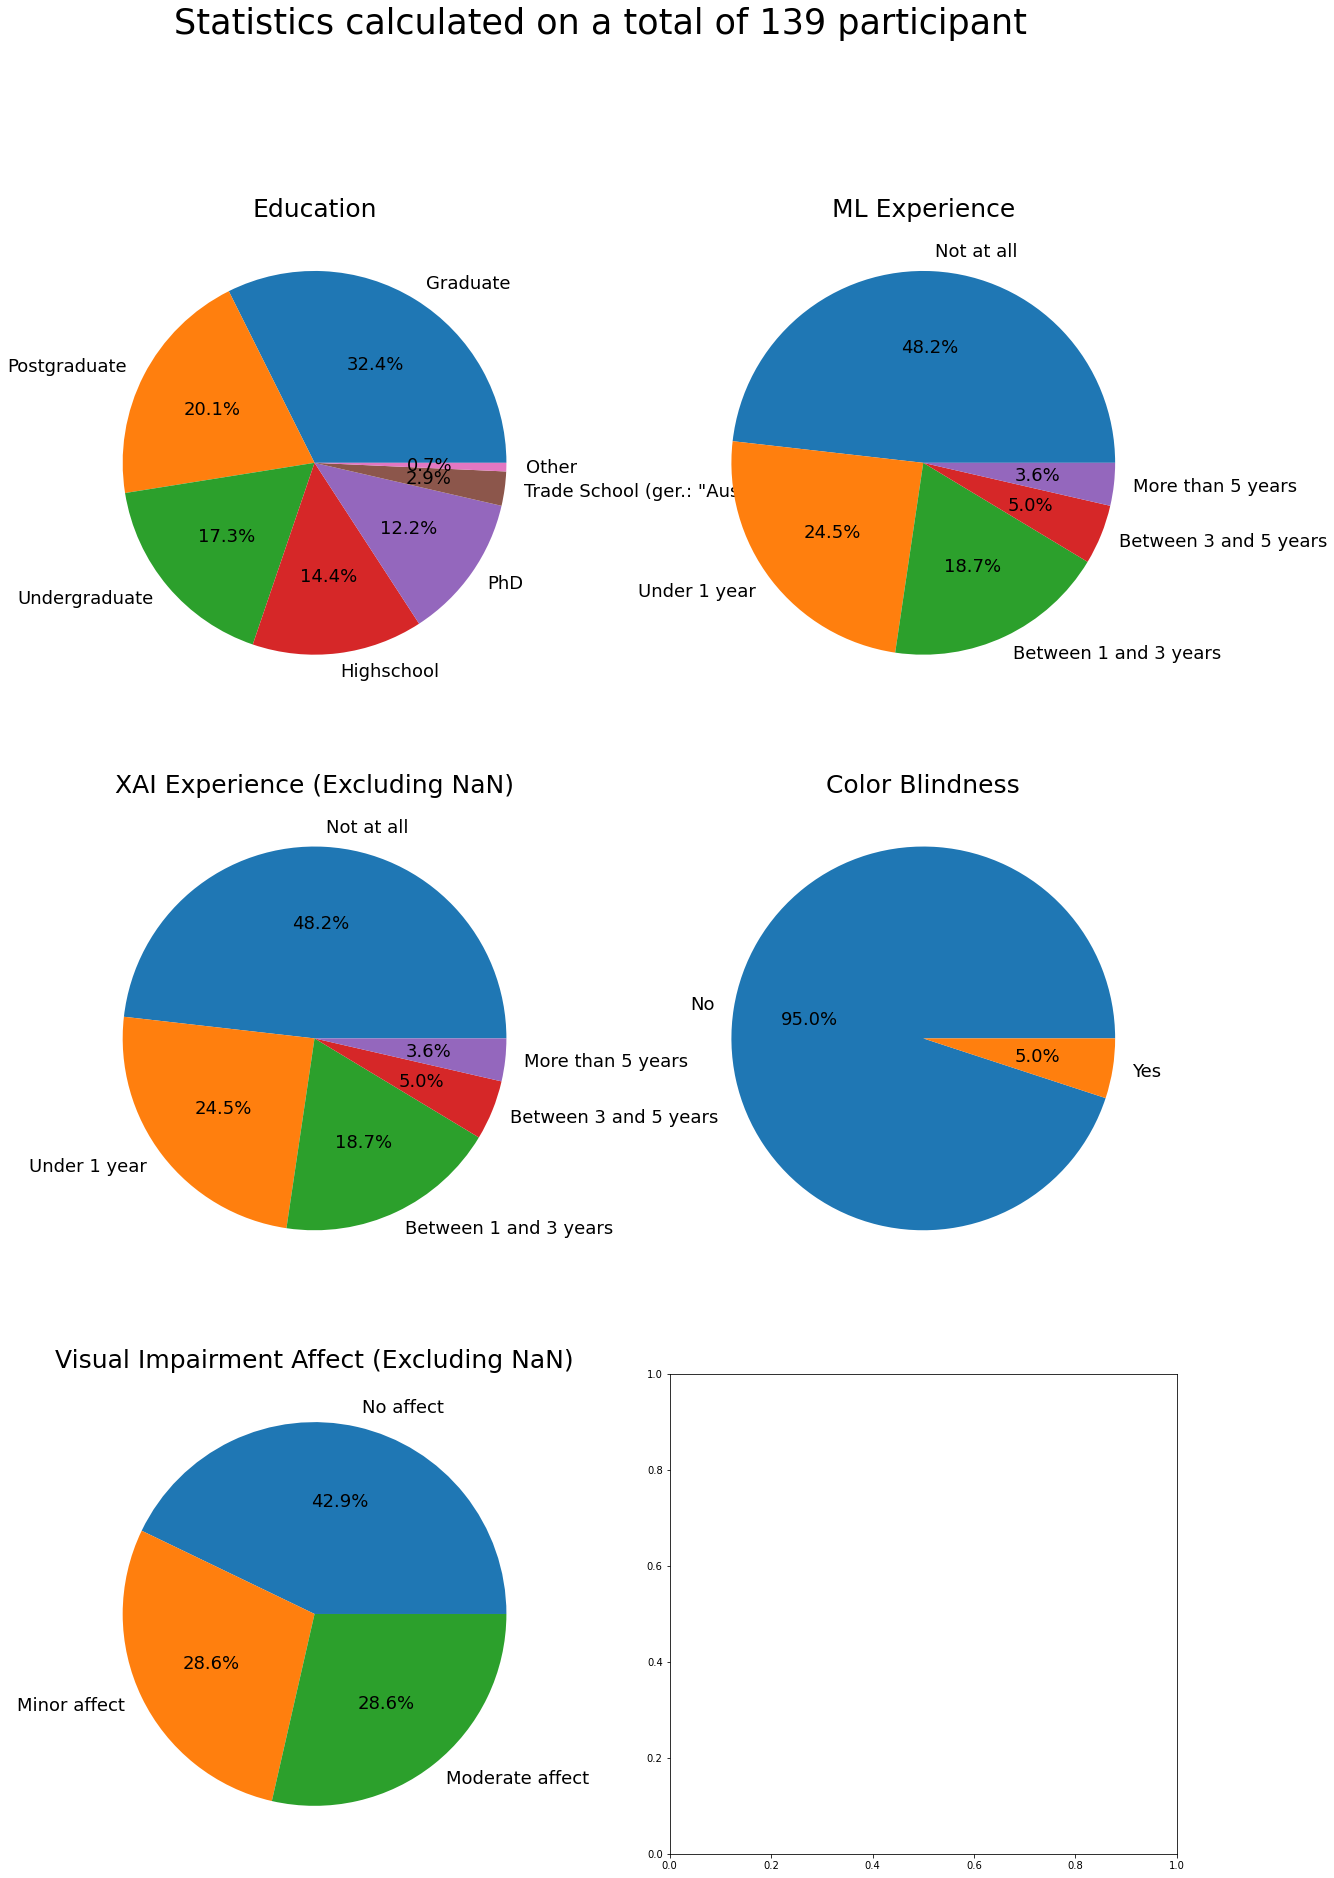

In [28]:
plot_statistics()